In [94]:
from qutip import *
import pandas as pd
import numpy as np
import scipy
from scipy import optimize
from scipy.interpolate import interp1d

import math
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

pi = np.pi

In [95]:
df = pd.read_csv("5points_spacing04_StdDevLimit0-05_1606222918.csv")
df

,# time,without PS output_1,without PS output_2,time,with PS output_1,with PS output_2,0.1s sleep | spacing=0.4 | 5 points | 5dBm | Std dev limit=0.05 | pass rate=100.0%
0,0.000000,1.563869e-08,4.988654e-08,0.000000,1.349361e-08,5.449893e-08,NaN
1,1.064476,1.597441e-08,4.964795e-08,1.054797,1.369622e-08,5.435772e-08,NaN
2,2.110424,1.651980e-08,4.875688e-08,2.111366,1.383875e-08,5.438693e-08,NaN
3,3.181690,1.772840e-08,4.692605e-08,3.166840,1.401309e-08,5.433215e-08,NaN
4,4.253428,1.920557e-08,4.428448e-08,4.238909,1.468453e-08,5.340335e-08,NaN
...,...,...,...,...,...,...,...
95,101.878038,1.804056e-08,4.690535e-08,101.877455,1.812891e-08,4.734967e-08,NaN
96,102.948752,1.589902e-08,5.040146e-08,102.933257,2.085944e-08,4.216880e-08,NaN
97,104.004527,1.564222e-08,5.098334e-08,104.004644,1.379281e-08,5.492133e-08,NaN
98,105.076048,1.614050e-08,5.027121e-08,105.076425,1.367030e-08,5.679725e-08,NaN


In [96]:
df['# time'] = (df['# time'] - df['# time'][0])

In [97]:
def Watts_to_dBm(x):
    return 10 * math.log(x * 1000, 10)

In [99]:
y1 = [Watts_to_dBm(x) for x in df[' with PS output_1']]
y2 = [Watts_to_dBm(x) for x in df[' with PS output_2']]

In [100]:
Y_results = [y1, y2]

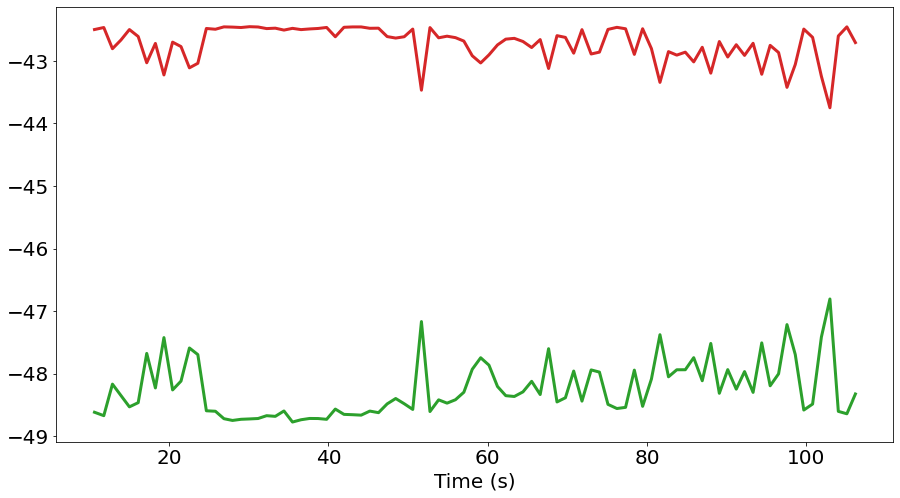

In [106]:
fig, ax1 = plt.subplots(figsize=(15,8))
colours = ['tab:green', 'tab:red', 'tab:blue']

for index, y_result in enumerate(Y_results):
    x = df['# time']
    y = y_result
    lns1 = ax1.plot(x[10:], y[10:], color=colours[index], markersize=7, linewidth=3)
    
ax1.set_xlabel('Time (s)', fontsize=20)
# ax1.set_ylabel('Power (W)', fontsize=20)
# ax1.set_xlim(20,100)
# ax1.set_ylim(1e-8,6e-8)
ax1.tick_params(labelsize=20)
# plt.plot([0, 0], [0, 1.7], 'r--', lw=2)
# plt.grid()

# ax1.legend(['Ch1','Ch2',], fontsize=15, loc=6)

plt.savefig('Classic_Phase_Stabilised', bbox_inches='tight')

plt.show()

In [40]:
def Sine(x, amp, freq, phi_0, y_off):
    return amp*np.sin(freq*x+phi_0)+y_off

In [46]:
initial_guess=[max(y), 2, 0, min(y)]
param_bounds=([0, 0, -np.inf, 0], [2*max(y), 100, np.inf, max(y)]) 
params, params_covariance = optimize.curve_fit(Sine, x, y, p0 = initial_guess)
sin_fit = Sine(x1, params[0], params[1], params[2], params[3])

In [71]:
x1 = np.arange(-pi/4,2*pi+pi/4, pi/8)
x2 = np.arange(-pi/4,2*pi+pi/4, pi/4)
y1 = np.sin(x1)
y2 = np.sin(x2+2)
xnew = np.arange(-pi/4,2*pi+pi/4, pi/64)

In [76]:
f1 = interp1d(x1, y1, kind='cubic', fill_value="extrapolate")
f2 = interp1d(x2, y2, kind='cubic', fill_value="extrapolate")

In [73]:
# y1 = Sine(x1, params[0], params[1], params[2], params[3])
# y2 = Sine(x2, params[0], params[1], params[2], params[3])

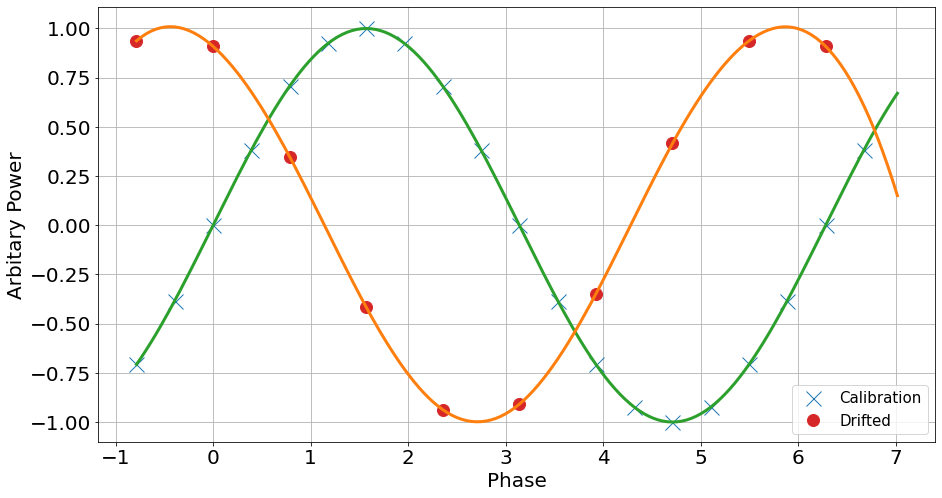

In [87]:
fig, ax1 = plt.subplots(figsize=(15,8))
colours = ['tab:green', 'tab:red', 'tab:blue']


lns1 = ax1.plot(x1, y1, color=colours[0], marker = 'x', markersize=15, mec='tab:blue', linewidth=0)
lns1 = ax1.plot(x2, y2, color="tab:orange", marker = 'o', markersize=12, mfc='tab:red', mec='tab:red', linewidth=0)

lns1 = ax1.plot(xnew, f1(xnew), color=colours[0], linewidth=3)
lns1 = ax1.plot(xnew, f2(xnew), color="tab:orange", linewidth=3)
    
ax1.set_xlabel('Phase', fontsize=20)
ax1.set_ylabel('Arbitary Power', fontsize=20)
# ax1.set_xlim(20,100)
# ax1.set_ylim(1e-8,6e-8)
ax1.tick_params(labelsize=20)
# plt.plot([0, 0], [0, 1.7], 'r--', lw=2)
plt.grid()

ax1.legend(['Calibration','Drifted',], fontsize=15, loc=4)

plt.savefig('Model_phase_correction', bbox_inches='tight')

plt.show()